In [218]:
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings    
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from pylab import rcParams

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [220]:
data_orig = pd.read_csv('datasets/creditcard.csv')
df = data_orig.copy()

In [120]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [122]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [123]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [124]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

# How different are the amount of money used in different transaction classes?

In [125]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [126]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

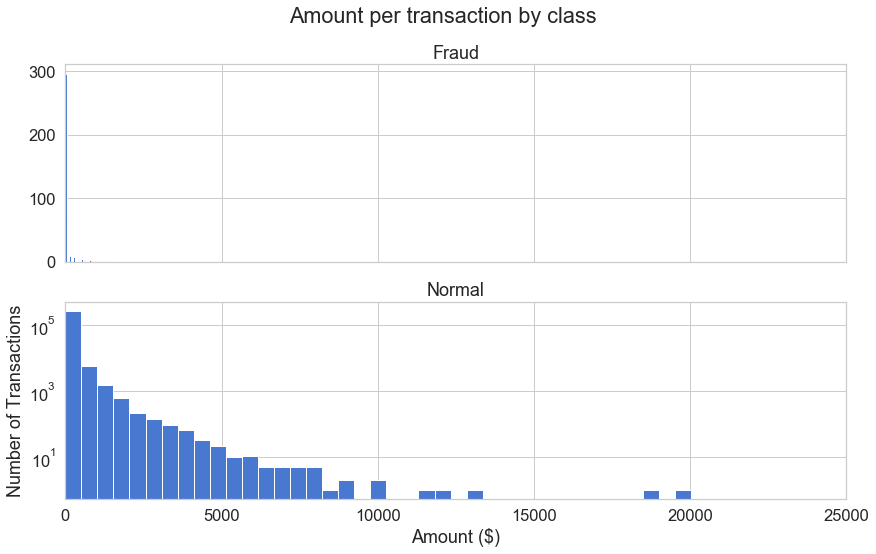

In [127]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 25000))
plt.yscale('log')
plt.show();

# Do fraudulent transactions occur more often during certain time?

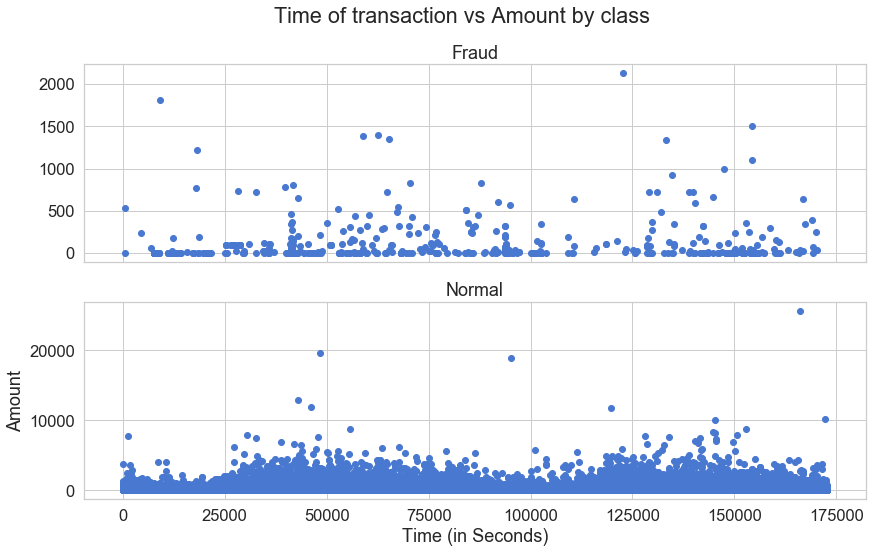

In [128]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Doesn’t seem like the time of transaction really matters.

## Autoencoders

* The job of those models is to predict the input, given that same input
* we want to learn a compressed representation of the data, thus find structure. This can be done by limiting the number of hidden units in the model. Those kind of autoencoders are called undercomplete

* Reconstruction error : We optimize the parameters of our Autoencoder model in such way that a special kind of error — reconstruction error is minimized.



# Preparing the data


In [129]:
from sklearn.preprocessing import StandardScaler
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

### we train on the normal dataset only. Test dataset contains both normal and fraudulent transactions

In [130]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227451, 29)

In [131]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([56864,    98], dtype=int64))

# Building the model

    1. simple model using only one hidden layer in encoder and decoder without regularization
    2. simple model using only one hidden layer in encoder and decoder using regularization
    3. adding noise to the input data

# Encoder / decoder using just one hidden layer without regularization

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 29)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_42 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_44 (Dense)             (None, 29)                3741      
Total params: 11,821
Trainable params: 11,821
Non-trainable params: 0
_________________________________________________________________
None
Train on 227451 samples, validate on 56962 samples
Epoch 1/20
227451/227451 [==============================] - 9s 4

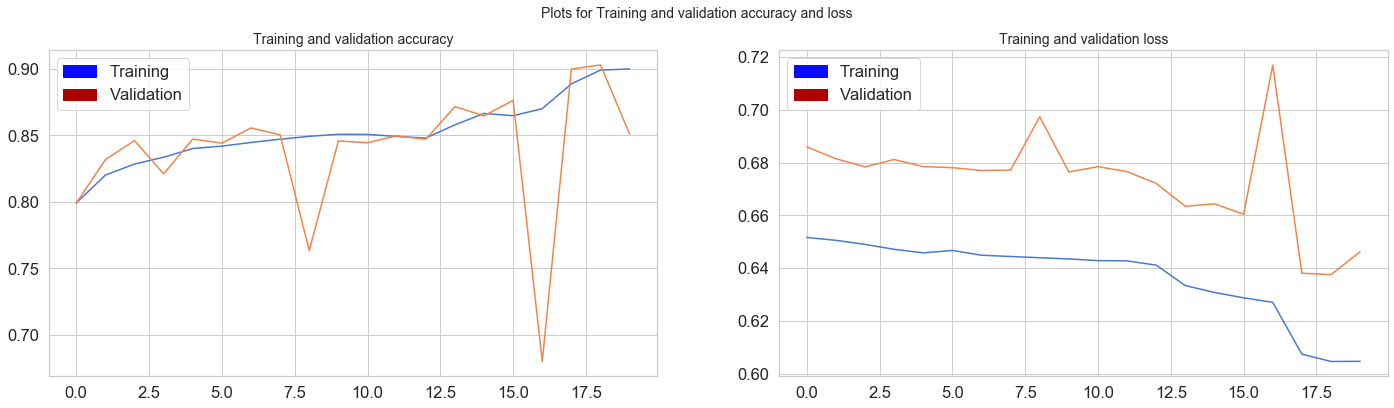

In [132]:
input_dim = X_train.shape[1]
code_dim = 16
hidden_dim = 128


epochs = 20
batch_size = 32


input_layer = Input(shape=(input_dim,))
hidden_1 = Dense(hidden_dim, activation='relu')(input_layer)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_layer = Dense(input_dim, activation='relu')(hidden_2)

autoencoder = Model(input_layer, output_layer)

print(autoencoder.summary())

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=epochs,
                          batch_size=batch_size,shuffle=True,
                          validation_data=(X_test, X_test), verbose=1)




predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df_1 = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Training')
red_patch = mpatches.Patch(color='#AF0000', label='Validation')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Plots for Training and validation accuracy and loss', fontsize=14)

ax1.plot(epochs, acc)
ax1.plot(epochs, val_acc)
ax1.set_title('Training and validation accuracy', fontsize=14)
ax1.legend(handles=[blue_patch, red_patch])

ax2.plot(epochs, loss)
ax2.plot(epochs, val_loss)
ax2.set_title('Training and validation loss', fontsize=14)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()


standard_scores = autoencoder.predict(X_test).ravel()

# Encoder / decoder using just one hidden layer with regularization

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 29)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_46 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_47 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_48 (Dense)             (None, 29)                3741      
Total params: 11,821
Trainable params: 11,821
Non-trainable params: 0
_________________________________________________________________
None
Train on 227451 samples, validate on 56962 samples
Epoch 1/20
227451/227451 [==============================] - 12s 

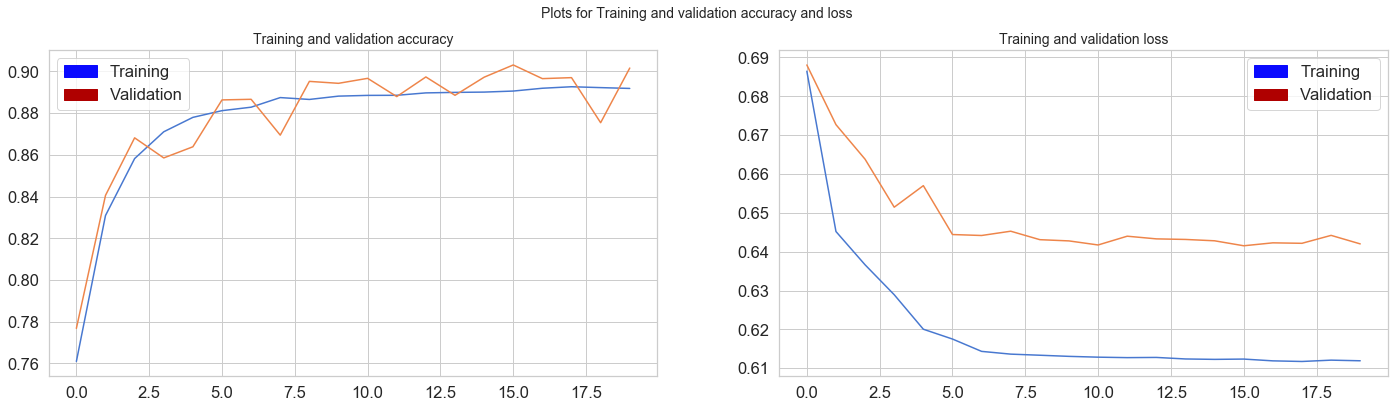

In [133]:
from keras.regularizers import l1
input_dim = X_train.shape[1]
code_dim = 16
hidden_dim = 128


epochs = 20
batch_size = 32


input_layer = Input(shape=(input_dim,))
hidden_1 = Dense(hidden_dim, activation='relu', activity_regularizer=l1(10e-6))(input_layer)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_layer = Dense(input_dim, activation='relu')(hidden_2)

autoencoder = Model(input_layer, output_layer)

print(autoencoder.summary())

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=epochs,
                          batch_size=batch_size,shuffle=True,
                          validation_data=(X_test, X_test), verbose=1)




predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df_1 = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Training')
red_patch = mpatches.Patch(color='#AF0000', label='Validation')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Plots for Training and validation accuracy and loss', fontsize=14)

ax1.plot(epochs, acc)
ax1.plot(epochs, val_acc)
ax1.set_title('Training and validation accuracy', fontsize=14)
ax1.legend(handles=[blue_patch, red_patch])

ax2.plot(epochs, loss)
ax2.plot(epochs, val_loss)
ax2.set_title('Training and validation loss', fontsize=14)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

regularized_scores = autoencoder.predict(X_test).ravel()

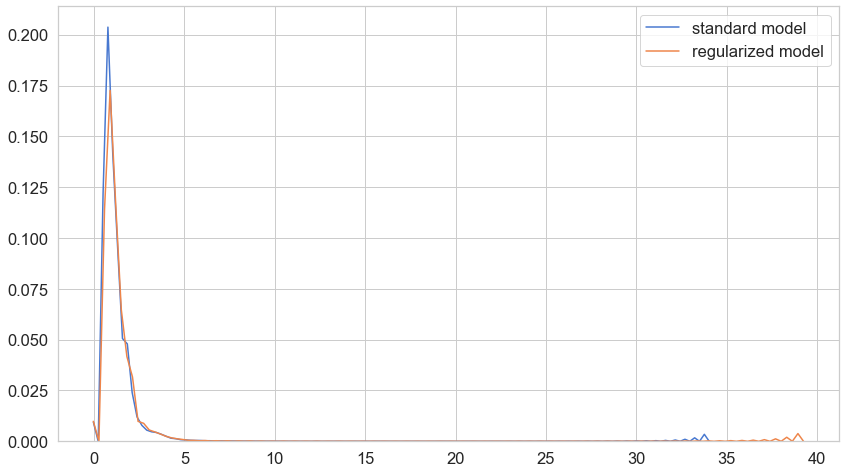

In [134]:
sns.distplot(standard_scores, hist=False, label='standard model')
sns.distplot(regularized_scores, hist=False, label='regularized model')

# Encoder / decoder using just one hidden layer with noise added to input data (Denoising Autoencoder)

In [107]:
noise_factor = 0.4
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

input_dim = X_train.shape[1]
code_dim = 16
hidden_dim = 128


epochs = 20
batch_size = 32


input_layer = Input(shape=(input_dim,))
hidden_1 = Dense(hidden_dim, activation='relu')(input_layer)
code = Dense(code_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_dim, activation='relu')(code)
output_layer = Dense(input_dim, activation='relu')(hidden_2)

autoencoder = Model(input_layer, output_layer)

print(autoencoder.summary())

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = autoencoder.fit(X_train_noisy, X_train, epochs=epochs,
                          batch_size=batch_size,shuffle=True,
                          validation_data=(X_test, X_test), verbose=1)




predictions = autoencoder.predict(X_test_noisy)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df_2 = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_26 (Dense)             (None, 29)                3741      
Total params: 11,821
Trainable params: 11,821
Non-trainable params: 0
_________________________________________________________________
None
Train on 227451 samples, validate on 56962 samples
Epoch 1/20
227451/227451 [==============================] - 9s 40

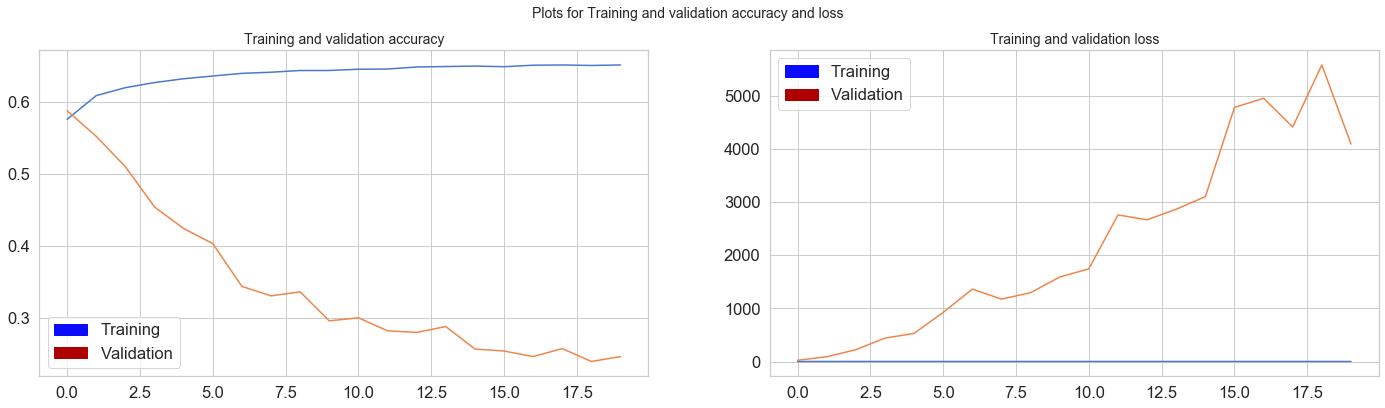

In [108]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Training')
red_patch = mpatches.Patch(color='#AF0000', label='Validation')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Plots for Training and validation accuracy and loss', fontsize=14)

ax1.plot(epochs, acc)
ax1.plot(epochs, val_acc)
ax1.set_title('Training and validation accuracy', fontsize=14)
ax1.legend(handles=[blue_patch, red_patch])

ax2.plot(epochs, loss)
ax2.plot(epochs, val_loss)
ax2.set_title('Training and validation loss', fontsize=14)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

# Encoder / decoder using just two hidden layers also with regularization

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_32 (Dense)             (None, 29)                3741

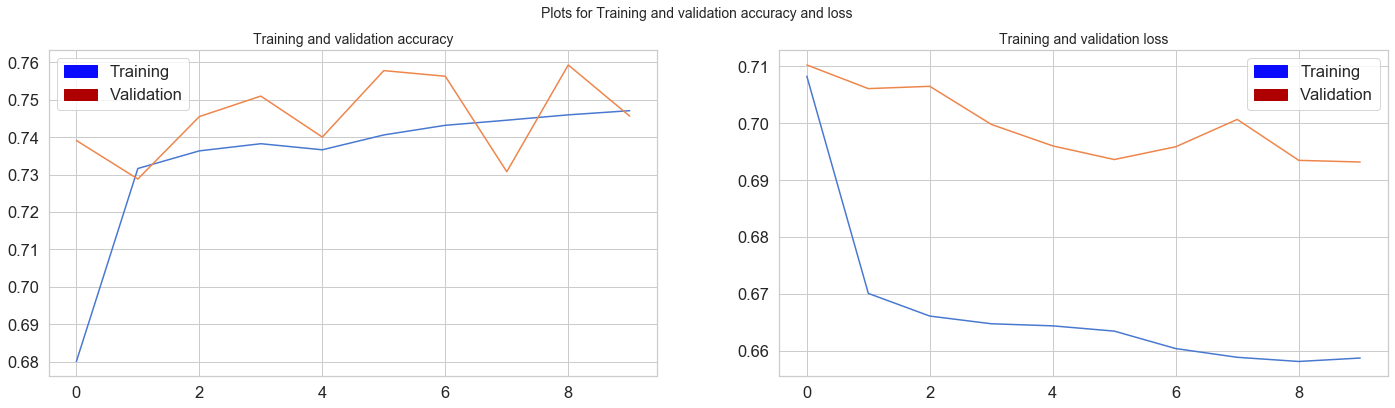

In [109]:
input_dim = X_train.shape[1]
code_dim = 16
hidden_dim_1 = 128
hidden_dim_2 = 64

epochs = 10
batch_size = 32

input_layer = Input(shape=(input_dim, ))
encoder_hidden_1 = Dense(hidden_dim_1, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_hidden_2 = Dense(hidden_dim_2, activation="relu")(encoder_hidden_1)
code = Dense(code_dim, activation="relu")(encoder_hidden_2)
decoder_hidden_1 = Dense(hidden_dim_2, activation='relu')(code)
decoder_hidden_2 = Dense(hidden_dim_1, activation="relu")(decoder_hidden_1)
output_layer = Dense(input_dim, activation='relu')(decoder_hidden_2)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

print(autoencoder.summary())

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=epochs,
                          batch_size=batch_size,shuffle=True,
                          validation_data=(X_test, X_test), verbose=1)
## Evaluation

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df_3 = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

## plot the training and validation accuracy

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Training')
red_patch = mpatches.Patch(color='#AF0000', label='Validation')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Plots for Training and validation accuracy and loss', fontsize=14)

ax1.plot(epochs, acc)
ax1.plot(epochs, val_acc)
ax1.set_title('Training and validation accuracy', fontsize=14)
ax1.legend(handles=[blue_patch, red_patch])

ax2.plot(epochs, loss)
ax2.plot(epochs, val_loss)
ax2.set_title('Training and validation loss', fontsize=14)
ax2.legend(handles=[blue_patch, red_patch])

plt.show()

In [112]:
# #autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# autoencoder.summary()

# checkpointer = ModelCheckpoint(filepath="model.h5",
#                                verbose=0,
#                                save_best_only=True)
# tensorboard = TensorBoard(log_dir='./logs',
#                           histogram_freq=0,
#                           write_graph=True,
#                           write_images=True)

# # check the output data , same as input data for both train and test
# history = autoencoder.fit(X_train, X_train,
#                     epochs=nb_epoch,
#                     batch_size=batch_size,
#                     shuffle=True,
#                     validation_data=(X_test, X_test),
#                     verbose=1,
#                     callbacks=[checkpointer, tensorboard])

# autoencoder = load_model('model.h5')

# Evaluation

In [64]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.660875,0.001720
std,3.418330,0.041443
min,0.023336,0.000000
25%,0.186833,0.000000
50%,0.317230,0.000000
75%,0.531267,0.000000
max,299.536586,1.000000


In [65]:
error_df[error_df['true_class']==1].head()

,reconstruction_error,true_class
43428,75.468605,1
116404,4.428055,1
215984,9.019079,1
249239,1.649991,1
146790,1.175633,1


In [66]:
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]

# Reconstruction error without fraud

(array([5.2529e+04, 2.4660e+03, 6.4200e+02, 3.6700e+02, 1.9400e+02,
        1.2800e+02, 8.3000e+01, 7.5000e+01, 5.6000e+01, 5.1000e+01]),
 array([0.02333599, 1.01634823, 2.00936048, 3.00237272, 3.99538496,
        4.9883972 , 5.98140945, 6.97442169, 7.96743393, 8.96044618,
        9.95345842]),
 <a list of 10 Patch objects>)

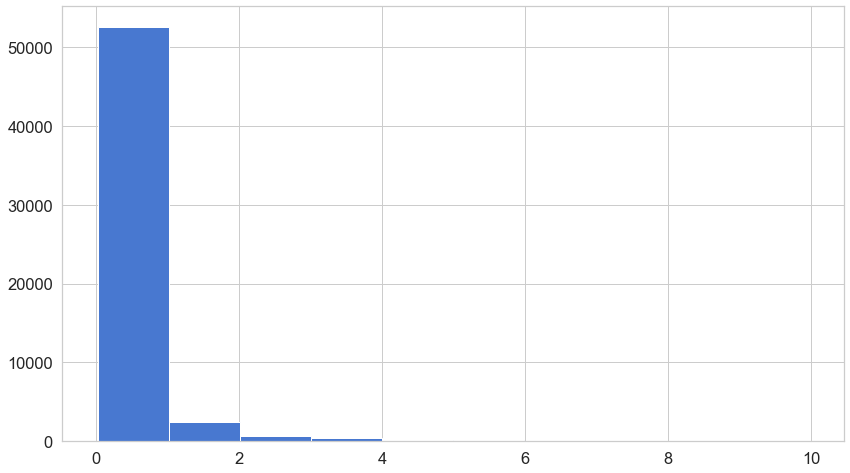

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
ax.hist(normal_error_df.reconstruction_error.values, bins=10)

# Reconstruction error with fraud

(array([73.,  6., 10.,  6.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([1.26283388e-01, 3.00673136e+01, 6.00083438e+01, 8.99493740e+01,
        1.19890404e+02, 1.49831434e+02, 1.79772465e+02, 2.09713495e+02,
        2.39654525e+02, 2.69595555e+02, 2.99536586e+02]),
 <a list of 10 Patch objects>)

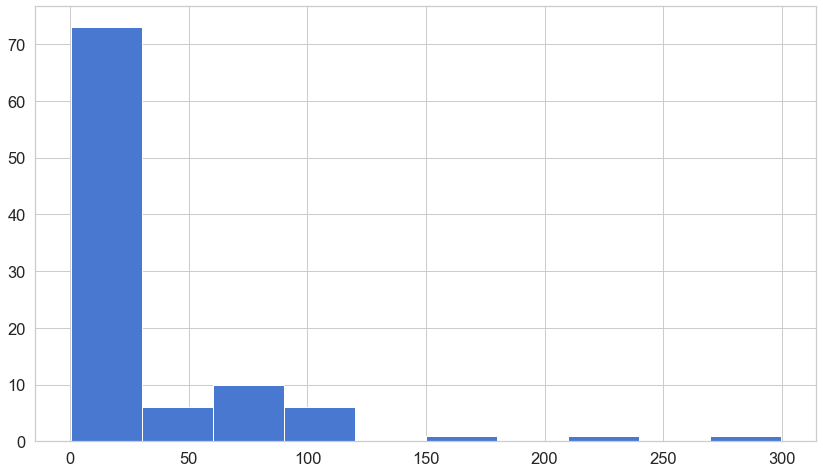

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [69]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

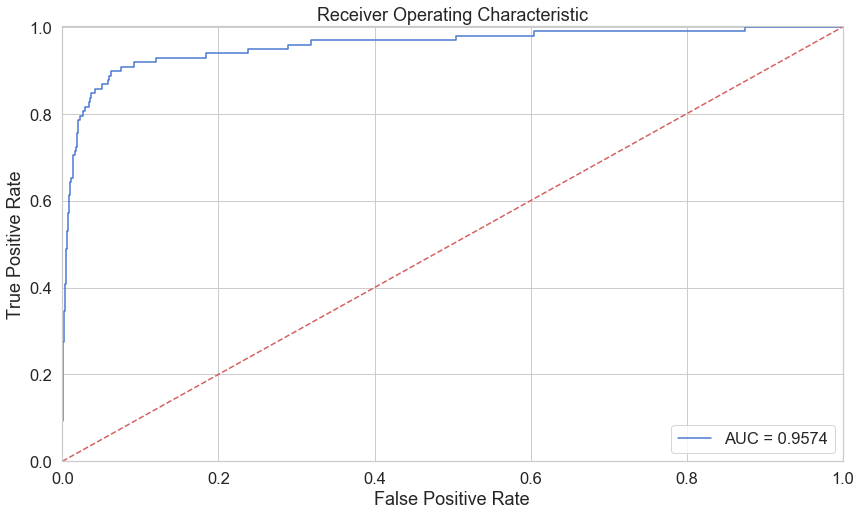

In [70]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [71]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
print(np.max(thresholds))
print(np.min(thresholds))
print(np.mean(thresholds))

300.5365855692218
0.02333599051182905
4.519031945470953


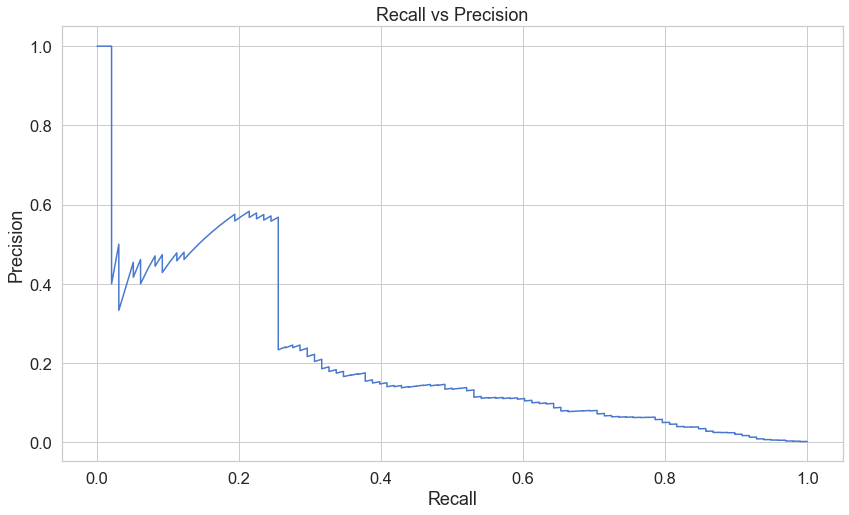

In [72]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [73]:
th.shape

(49325,)

In [74]:
precision.shape

(49326,)

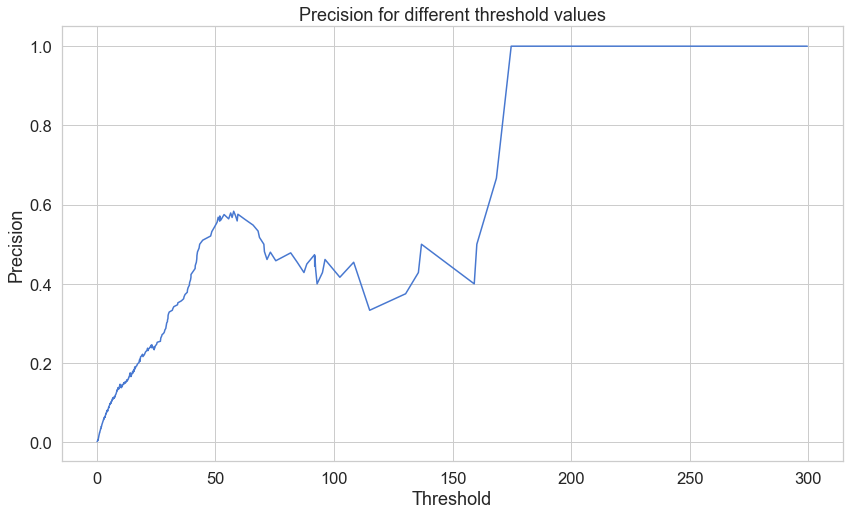

In [75]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

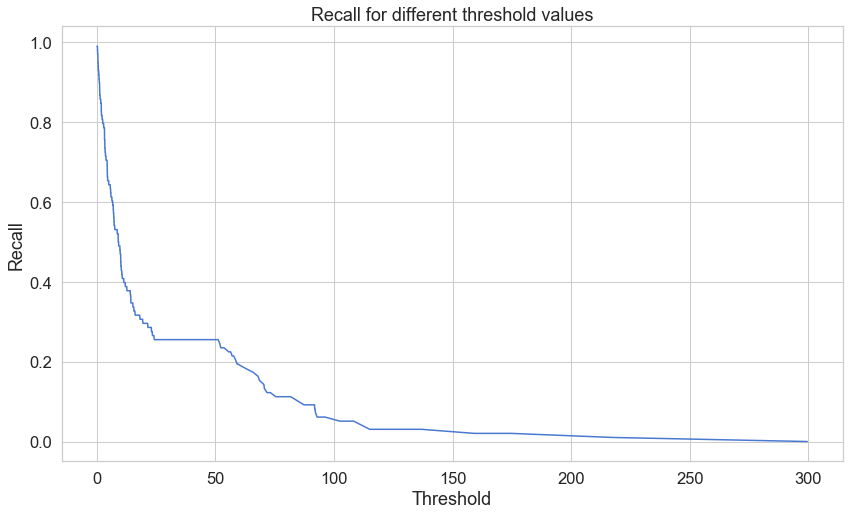

In [76]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.show()

# Prediction
Our model is a bit different this time. It doesn’t know how to predict new values. But we don’t need that. 
In order to predict whether or not a new/unseen transaction is normal or fraudulent, we’ll calculate the 
reconstruction error from the transaction data itself. If the error is larger than a predefined threshold, 
we’ll mark it as a fraud (since our model should have a low error on normal transactions). Let’s pick that value:

In [77]:
threshold = 3

And see how well we’re dividing the two types of transactions:


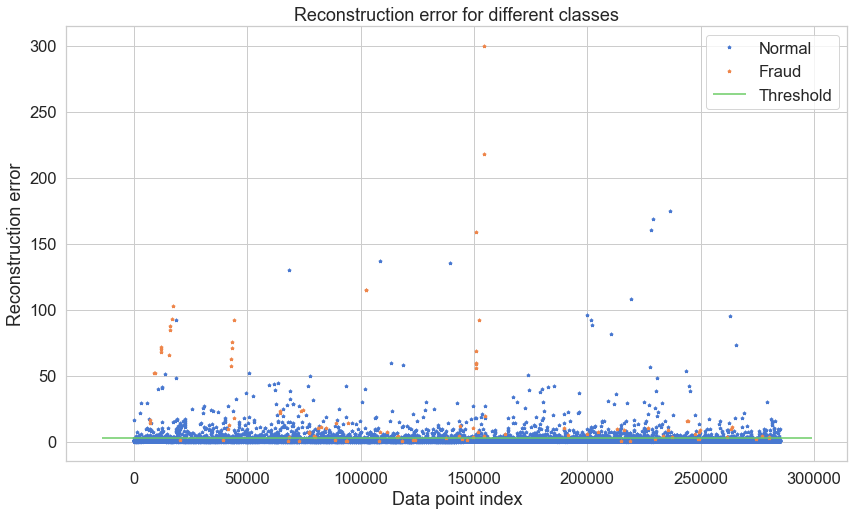

In [78]:
error_df_groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in error_df_groups:
    ax.plot(group.index, group.reconstruction_error, marker='*', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="g", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

true_class
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

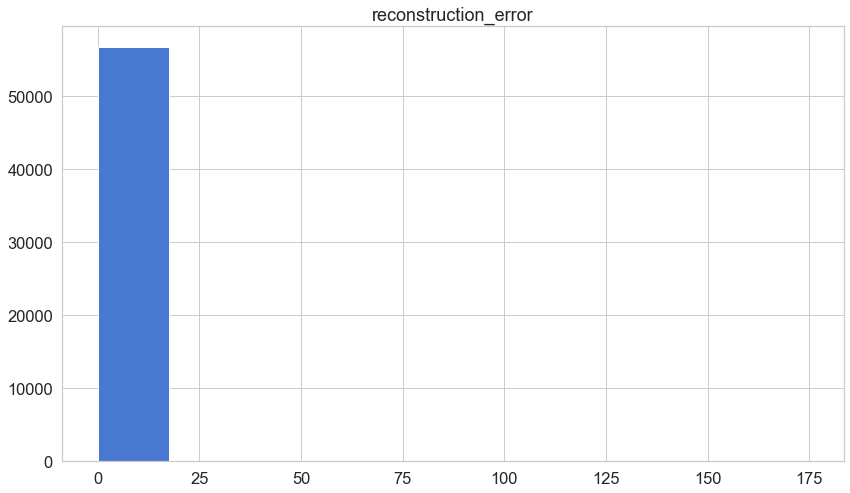

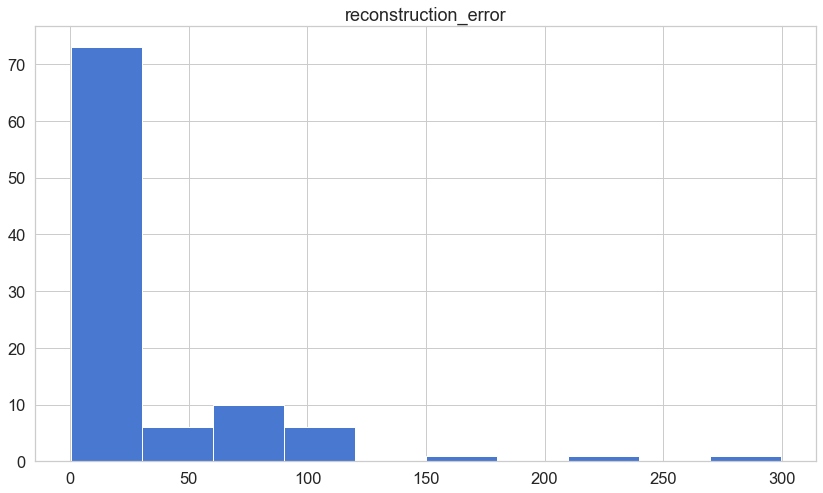

In [79]:
error_df_groups.hist()

In [80]:
error_df_groups.indices

{0: array([    1,     2,     3, ..., 56959, 56960, 56961], dtype=int64),
 1: array([    0,   565,  3025,  3228,  4178,  4640,  5100,  5756,  6054,
         6368,  7011,  7846,  8090,  8379,  8456,  9203, 10279, 10634,
        11066, 11245, 13509, 16473, 16564, 16592, 16839, 17345, 17388,
        18130, 18544, 18785, 18861, 19281, 19442, 19821, 20031, 21199,
        22412, 22588, 22718, 22797, 23380, 24197, 25774, 25903, 27670,
        27885, 28803, 30129, 30923, 30971, 31055, 31337, 31575, 32102,
        32656, 32949, 33127, 34064, 35049, 35931, 36216, 36674, 36677,
        36918, 37190, 37427, 37841, 37881, 38134, 40555, 40663, 40729,
        41451, 41626, 43088, 43475, 44671, 45276, 45516, 46943, 47649,
        48678, 48954, 50442, 50500, 51016, 51622, 53465, 53920, 54605,
        55409, 55459, 55764, 55799, 56196, 56282, 56288, 56467],
       dtype=int64)}

[[55635  1229]
 [   21    77]]


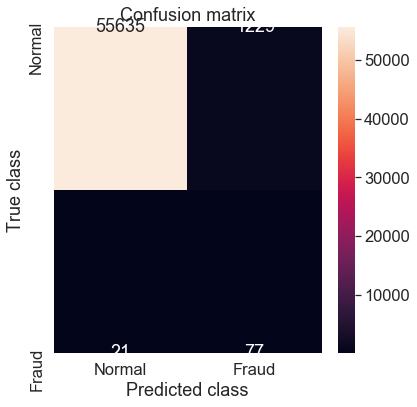

In [81]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
print(conf_matrix)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [82]:
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support

print("f1_score: %.2f" % f1_score(error_df.true_class, y_pred))
print("average_precision_score: %.2f" % average_precision_score(error_df.true_class, y_pred))
print("recall_score: %.2f" % recall_score(error_df.true_class, y_pred))
print("precision_score: %.2f" % precision_score(error_df.true_class, y_pred))
#print("precision_recall_fscore_support:", precision_recall_fscore_support(error_df.true_class, y_pred))

# th=2.9
# f1_score: 0.10
# average_precision_score: 0.04
# recall_score: 0.81
# precision_score: 0.05

# th=6
# f1_score: 0.17
# average_precision_score: 0.07
# recall_score: 0.65
# precision_score: 0.10

# th=10
# f1_score: 0.23
# average_precision_score: 0.07
# recall_score: 0.51
# precision_score: 0.14



# [[56286   578]
#  [   34    64]]

f1_score: 0.11
average_precision_score: 0.05
recall_score: 0.79
precision_score: 0.06


""High recall but low precision means many results, most of which has low or no relevancy.""

Our model seems to catch a lot of the fraudulent cases. Of course, there is a catch (see what I did there?). The number of normal transactions classified as frauds is really high. Is this really a problem? Probably it is. You might want to increase or decrease the value of the threshold, depending on the problem. That one is up to you.

# Conclusion
We’ve created a very simple Deep Autoencoder in Keras that can reconstruct what non fraudulent transactions looks like. 